# **[AIR QUALITY UCI](https://archive.ics.uci.edu/ml/datasets/Air+quality)**





---
**Abstract:** Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.
---

**Data Set Information:**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. 
The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

---
**Attribute Information:**

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity

---

## **Feature Engineering**

In [0]:
### Our main aim is to Feature Engineering and Predictive Modelling

### Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

### Setting the seaborn skin over matplotlib
sns.set(style='whitegrid')

In [38]:
### Importing the dataset
dataset = pd.read_csv('AirQualityUCI.csv', sep=',', delimiter=";",decimal=",")

### Print shape of dataset with rows and columns
print(dataset.shape)

(9471, 17)


*Dataset containing:*
* *Rows: 9471*
* *Columns: 17*

In [39]:
### Print the top 10 records
dataset.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [40]:
### Print bottom 10 records
dataset.tail(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*As we can see from the above two tables:*
* *The last two columns i.e., 'Unnamed: 15' and 'Unnamed: 16' contains complete NaN values.*
* *The data in all the last rows are missing or unavailable containing NaN values*

###### **From the Exploratory Data Analysis we can colude that:**
* *The data contains missing values in the form of NaN and -200.*
* *The two columns i.e., 'Unnamed: 15' and 'Unnamed: 16' contain 100% NaN values.*
* *There are date and time features in the dataset which is in the object datatype.*
* *Outliers are present in the data.*

## **Data Cleaning**

In [41]:
### **Checking the missing data in our dataset:**
dataset.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

Here we can see that there are some missing values in our dataset.

In [42]:
### Removing the Null Columns:
dataset = dataset.drop(["Unnamed: 15","Unnamed: 16"], axis=1)
dataset.dropna(inplace=True)
dataset.shape

(9357, 15)

In [43]:
### Date and Time are temporal features which in object datatype. 

### Setting date as subindex:
dataset.set_index("Date", inplace=True)
dataset.index = pd.to_datetime(dataset.index)
print('Datatype of Date Column: ',type(dataset.index))

### Converting time to hour
dataset['Time'] = pd.to_datetime(dataset['Time'],format= '%H.%M.%S').dt.hour
print('Datatype of Time Column: ',type(dataset['Time'][0]))

Datatype of Date Column:  <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Datatype of Time Column:  <class 'numpy.int64'>


In [44]:
### Checking the top 5 rows of dataset
dataset.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-10-03,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [45]:
dataset.describe(include='all')

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,6.923182,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,5.000000,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,11.000000,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,18.000000,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


* Each attribute is having -200 as minimum value. 
* After checking for every attributes it is imposibble it to have minus value except T (Temperature). But, it's impossible too if the Temperature -200, because this case will be about High pollution in the air.
* So here we are considering -200 as NaN value.

**Replacing -200 with NaN(null value):**

In [0]:
dataset.replace(to_replace= -200, value= np.NaN, inplace= True)

**Now again checking the total number of NaN values in the dataset:**

In [47]:
dataset.isnull().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

So there are null values present in the dataset.

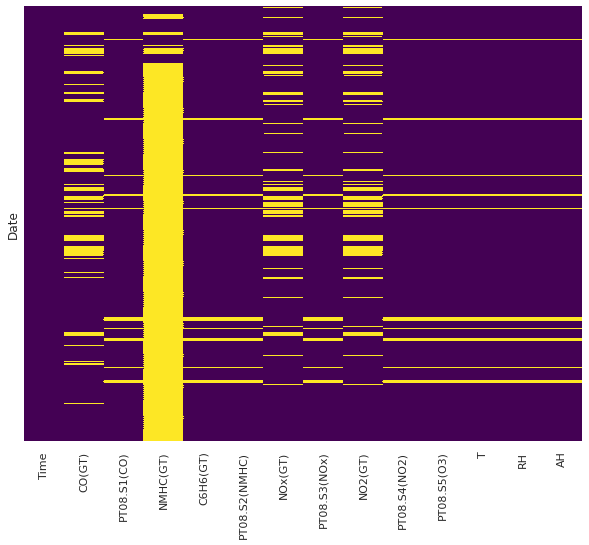

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

As from above we can see that the attribute name NMHC(GT) is containing maximum null values in it. So we will drop it permanentely.

**Dropping the column name NMHC(GT):**

In [0]:
dataset.drop('NMHC(GT)', axis=1, inplace=True)

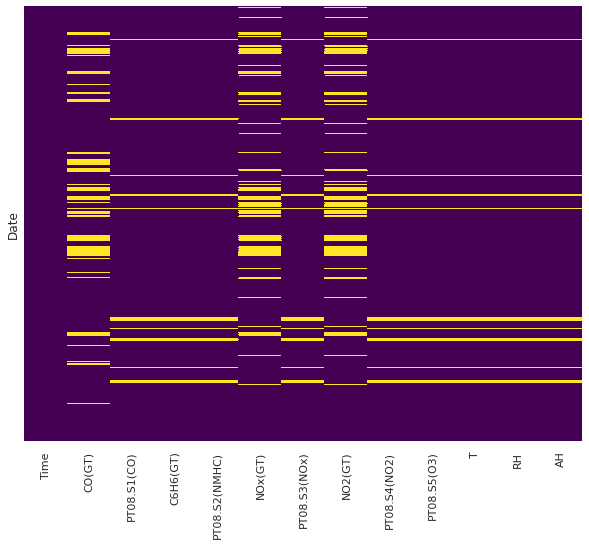

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

We've dropped the column that contains maximum number of null values. But still there are null values in our dataset.

In [0]:
def remove_outlier(col):
    dataset[col] = dataset.groupby('Date')[col].transform(lambda x: x.fillna(x.median()))

**Replacing the Null value with median.**

In [0]:
dataset.median()

Time               11.0000
CO(GT)              1.8000
PT08.S1(CO)      1063.0000
C6H6(GT)            8.2000
PT08.S2(NMHC)     909.0000
NOx(GT)           180.0000
PT08.S3(NOx)      806.0000
NO2(GT)           109.0000
PT08.S4(NO2)     1463.0000
PT08.S5(O3)       963.0000
T                  17.8000
RH                 49.6000
AH                  0.9954
dtype: float64

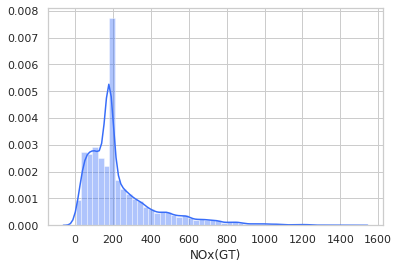

In [53]:
dataset.fillna(dataset.median(), inplace=True)
sns.distplot(dataset['NOx(GT)'])
plt.show()

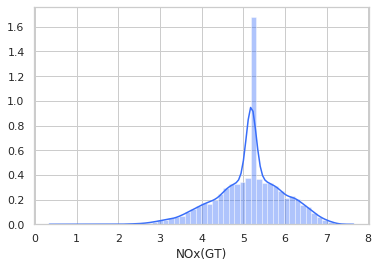

In [54]:
sns.distplot(np.log(dataset['NOx(GT)']))
plt.show()

**Checking the null values again after replacing the null values by median:**

In [0]:
dataset.isnull().sum()

Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

As we can see, there are 0 null value in each column.

**Checking the description of the dataset again:**

In [0]:
dataset.describe()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,2.089302,1098.392433,10.009447,937.973923,235.178903,834.339959,112.373303,1456.528054,1020.562894,18.297574,49.248509,1.024352
std,6.923182,1.323024,212.911465,7.311771,261.625561,195.091025,251.808888,43.948519,339.370072,390.784960,8.658221,16.974949,0.395878
min,0.000000,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,5.000000,1.200000,941.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,11.000000,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,18.000000,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,23.000000,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


* From the above description, we can see the minimum & maximum value, count, standard deviation, mean, median of each column in the dataset.
* We can also predict the skewness of the dataset by comparing the mean and median value.

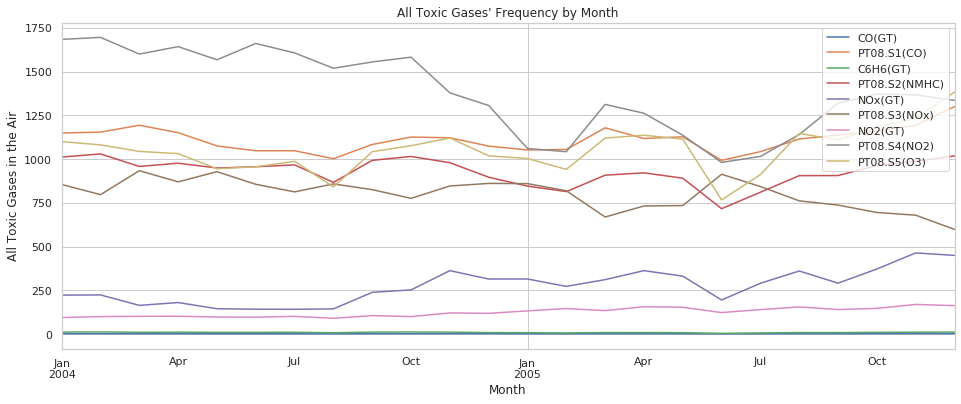

In [82]:

dataset.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize=(16,6))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("All Toxic Gases' Frequency by Month")
plt.show()

In the above graph, you can see the frequency of all toxics that is usually in polluted air. The Brown line shows Nitrogen Oxides (NOx) and Yellow line shows NO2 which is part of NOx. It is a mixture of gases are composed of nitrogen and oxygen. Two of the most toxicologically significant compounds are nitric oxide (NO) and nitrogen dioxide (NO2). I chose Nitrogen Oxides(NOx) because these are one of the most dangerous forms of air pollution and are most relevant for air pollution. However, There are many others ways to measure air pollution, including PM10 (particulate matter around between 2.5 and 10 microns in diameter), carbon monoxide, sulfur dioxide, nitrogen dioxide, ozone (O3), etc.

NOx is produced from the reaction of nitrogen and oxygen gases in the air during combustion, especially at high temperatures. In areas of high motor vehicle traffic, such as in large cities, the amount of nitrogen oxides emitted into the atmosphere as air pollution can be significant.

It is mainly due to fossil fuel combustion from both stationary sources, i.e. power generation (21%), and mobile sources, i.e. transport (44%). Other atmospheric contributions come from non-combustion processes, for example nitric acid manufacture, welding processes and the use of explosives.

In addition, these create serious health issues. These mainly impact on respiratory conditions causing inflammation of the airways at high levels. Long term exposure can decrease lung function, increase the risk of respiratory conditions and increases the response to allergens. NOx also contributes to the formation of fine particles (PM) and ground level ozone, both of which are associated with adverse health effects.

Ref: https://www.epa.gov/no2-pollution/basic-information-about-no2#Effects

## **Machine Learning**

### **Linear Regression without outliers**

In [0]:
X=dataset[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NO2(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']]
X = np.log(X)
y=dataset['NOx(GT)']
y = np.log(y)

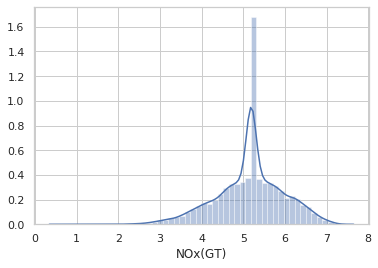

In [302]:
sns.distplot(y)

Nitrc oxide is normally distributed. With the help of log transformation we are passing the linearty and homosedastisity assumptions.

**Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=0)

**Feature Scaling**

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

We have used robust scaler because there are outliers in our data.

**Fitting the model**

In [305]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prediction**

In [0]:
y_predict=lreg.predict(X_test)

In [307]:
from sklearn.metrics import r2_score
r2score_lreg=r2_score(y_test,y_predict)
r2score_lreg

0.8644672557874544

**Accuracy on training data**

In [0]:
prediction = lreg.predict(X_train)

In [309]:
score_train = lreg.score(X_train, y_train)
score_train

0.8699066028475861

**Accuracy on Test Data**

In [0]:
prediction = lreg.predict(X_test)

In [311]:
score_test = lreg.score(X_test, y_test)
score_test

0.8644672557874544

By this we can say that our model is not Bias because there's not so much difference between training and testing data.

### **K-Nearest Neighbor**

In [312]:
from sklearn.neighbors import KNeighborsRegressor
kreg=KNeighborsRegressor(n_neighbors=5)
kreg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
y_predict_knn=kreg.predict(X_test)

In [314]:
kreg_train = kreg.score(X_train,y_train)
kreg_train

0.954436049206

In [315]:
kreg_test = kreg.score(X_test,y_test)
kreg_test

0.9225097975893867

We can see that, the training and testng accuracy doesn't have ajor difference. Therefore, our model is not bias.

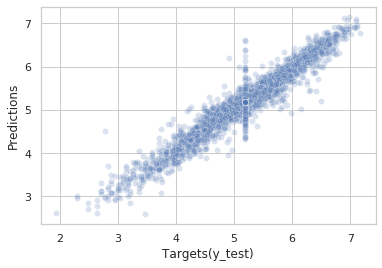

In [316]:
sns.scatterplot(y_test, kreg.predict(X_test), alpha=0.2)
plt.xlabel('Targets(y_test)')
plt.ylabel('Predictions')
plt.show()

We can see that, the more closer the points gets to 45 degree the more accurate the predictions are.

### **Decision Tree Regressor**

In [317]:
from sklearn.tree import DecisionTreeRegressor
dreg=DecisionTreeRegressor()
dreg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [318]:
dreg_train = dreg.score(X_train,y_train)
dreg_train

0.9995831136818056

In [319]:
dreg_test = dreg.score(X_test,y_test)
dreg_test

0.8826384917074599

There's some difference in training and testing data, therefore decision tree regressor is little bit bias.

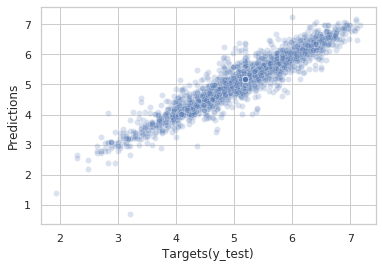

In [320]:
sns.scatterplot(y_test, dreg.predict(X_test), alpha=0.2)
plt.xlabel('Targets(y_test)')
plt.ylabel('Predictions')
plt.show()

Because of bias, our model is performing little bit incorrectly at values 100 to 350 of training and testing.

### **Random Forest Regressor**

In [321]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor(n_estimators=10,random_state=42)
rfreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [322]:
rfreg.predict(X_test)

array([4.47748472, 4.76982812, 3.69262267, ..., 5.19296275, 5.51719423,
       5.16994915])

In [323]:
rfreg_train = rfreg.score(X_train,y_train)
rfreg_train

0.9884801463742947

In [324]:
rfreg_test = rfreg.score(X_test,y_test)
rfreg_test

0.9357737269667997

Our model is good but its showing little bias.

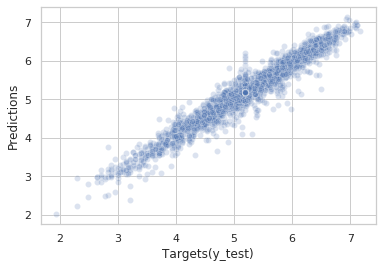

In [325]:
sns.scatterplot(y_test, rfreg.predict(X_test), alpha=0.2)
plt.xlabel('Targets(y_test)')
plt.ylabel('Predictions')
plt.show()

**Hyperparameter Tuning**

In [326]:
from scipy.stats import uniform
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
 
# Designate distributions to sample hyperparameters from 
n_estimators = np.random.uniform(10, 100, 5).astype(int)
max_features = np.random.normal(6, 3, 5).astype(int)
 
# Check max_features>0 & max_features<=total number of features
max_features[max_features <= 0] = 1
max_features[max_features > X.shape[1]] = X.shape[1]
 
hyperparameters = {'n_estimators': list(n_estimators),
                   'max_features': list(max_features),
                   }
 
print (hyperparameters)

{'n_estimators': [59, 87, 73, 37, 85], 'max_features': [1, 2, 6, 7, 1]}


In [209]:
# Run randomized search
randomCV = RandomizedSearchCV(RandomForestRegressor(), param_distributions=hyperparameters, n_iter=20)
randomCV.fit(X_train, y_train)
 
# Identify optimal hyperparameter values
best_n_estim      = randomCV.best_params_['n_estimators']
best_max_features = randomCV.best_params_['max_features']  
 
print("The best performing n_estimators value is: {:5d}".format(best_n_estim))
print("The best performing max_features value is: {:5d}".format(best_max_features))
 
# Train classifier using optimal hyperparameter values
# We could have also gotten this model out from randomCV.best_estimator_
rf = RandomForestRegressor(n_estimators=best_n_estim,
                            max_features=best_max_features)
 
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
 

print ("Overall Accuracy:", round(metrics.r2_score(y_test, rf_predictions), 3))

The best performing n_estimators value is:    67
The best performing max_features value is:     5
Overall Accuracy: 0.944


In [327]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor(n_estimators=67,random_state=42,max_features=5)
rfreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=67, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [328]:
rfreg.predict(X_test)

array([4.49997455, 4.77374591, 3.56637156, ..., 5.19287413, 5.57925479,
       5.1791007 ])

In [329]:
rfreg_train = rfreg.score(X_train,y_train)
rfreg_train

0.9917934704752639

In [330]:
rfreg_test = rfreg.score(X_test,y_test)
rfreg_test

0.9421008709357758

We have the optimized accuracy now.

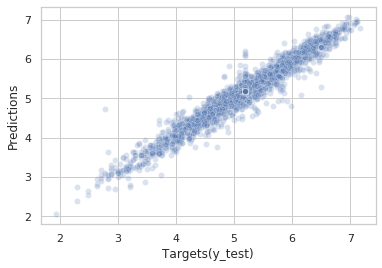

In [331]:
sns.scatterplot(y_test, rfreg.predict(X_test), alpha=0.2)
plt.xlabel('Targets(y_test)')
plt.ylabel('Predictions')
plt.show()

Optimized sctterplot of prediction vs actual.

### **SVM**

In [332]:
from sklearn.svm import SVR
sreg = SVR(kernel='linear')
sreg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [333]:
sreg.predict(X_test)

array([4.35559243, 4.70670332, 3.55535511, ..., 4.83890897, 5.50526384,
       4.79054485])

In [334]:
sreg_train = sreg.score(X_train,y_train)
sreg_train

0.8683385757580707

In [335]:
sreg_test = sreg.score(X_test,y_test)
sreg_test

0.8632344463386883

Our model is good and is not bias.

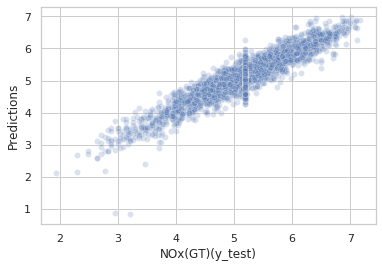

In [336]:
sns.scatterplot(y_test, sreg.predict(X_test), alpha=0.2)
plt.xlabel('NOx(GT)(y_test)')
plt.ylabel('Predictions')
plt.show()

Really good at predicting lower level.

### **XGBoost**

In [337]:
from xgboost import XGBRegressor
xreg = XGBRegressor()
xreg.fit(X_train, y_train)

[08:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_predict = xreg.predict(X_test)

In [339]:
r2_score(y_test, y_predict)

0.9142645085662329

In [340]:
xreg_train = xreg.score(X_train,y_train)
xreg_train

0.9294343601334216

In [341]:
xreg_test = xreg.score(X_test,y_test)
xreg_test

0.9142645085662329

There does not contain any difference between training and test.

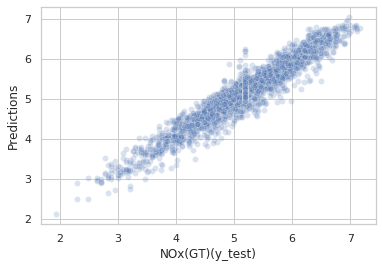

In [342]:
sns.scatterplot(y_test, xreg.predict(X_test), alpha=0.2)
plt.xlabel('NOx(GT)(y_test)')
plt.ylabel('Predictions')
plt.show()

**Hyper-parameter Optimization**

In [0]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [0]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [0]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xreg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [347]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  8.3min finished


[08:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['

In [348]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [350]:
from xgboost import XGBRegressor
xreg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xreg.fit(X_train, y_train)

[08:55:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_predict = xreg.predict(X_test)

In [352]:
r2_score(y_test, y_predict)

0.9471835135104048

In [353]:
xreg_train = xreg.score(X_train,y_train)
xreg_train

0.9994472732884594

In [354]:
xreg_test = xreg.score(X_test,y_test)
xreg_test

0.9471835135104048

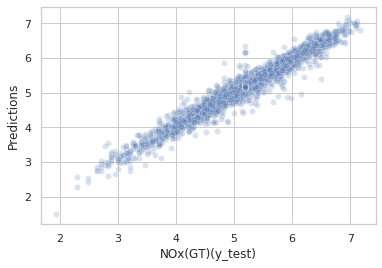

In [355]:
sns.scatterplot(y_test, xreg.predict(X_test), alpha=0.2)
plt.xlabel('NOx(GT)(y_test)')
plt.ylabel('Predictions')
plt.show()

XGBoost is good but is little bit bias.

### **Final Accuracies**

In [356]:
results = pd.DataFrame({'Algorithm':['Linear Regression(Z-Score)','K-Nearest Neighbour Regressor','Decision Tree Regressor', 'Random Forest Regressor',
                                     'Support Vector Machine Regressor', 'XGBoost'],
                        'Train Accuracy':[score_train, kreg_train, dreg_train,rfreg_train, sreg_train,xreg_train],
                        'Test Accuracy':[score_test, kreg_test, dreg_test,rfreg_test, sreg_test,xreg_test]})
results.sort_values('Test Accuracy', ascending=False)

,Algorithm,Train Accuracy,Test Accuracy
5,XGBoost,0.999447,0.947184
3,Random Forest Regressor,0.991793,0.942101
1,K-Nearest Neighbour Regressor,0.954436,0.922510
2,Decision Tree Regressor,0.999583,0.882638
0,Linear Regression(Z-Score),0.869907,0.864467
4,Support Vector Machine Regressor,0.868339,0.863234


**Conclusion:** 
* Gases like CO, NOx, titania, and Benzene are increased in the air over time.
* The frequency of Oxides in Nitrogen is increasing
* During the day Nitrogen Oxides' level is high compared to night
* By looking at above table, we conclude that Random Forest regressor performed best and is not bias as there is not much difference between predicting the training and testing data.